# Getting Started Code for [Chunin Exams Food Track- CV'2021](https://www.aicrowd.com/challenges/chunin-exams-food-track-cv-2021) on AIcrowd
#### Author : Rohit Jamuar


## Download Necessary Packages 📚

In [ ]:
!pip install aicrowd-cli

## Download Data
The first step is to download out train test data. We will be training a model on the train data and make predictions on test data. We submit our predictions.


In [ ]:
API_KEY = "cc31ca4645fecf33e78ff11aaf7d7eac" #Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!aicrowd dataset download --challenge chunin-exams-food-track-cv-2021

In [ ]:
#!cp /content/*.csv  /content/drive/MyDrive/assignment5/
#!cp /content/*.zip  /content/drive/MyDrive/assignment5/ 

#!unzip /content/drive/MyDrive/assignment5/train_images.zip -d /content/drive/MyDrive/assignment5/ 
#!unzip /content/drive/MyDrive/assignment5/test_images.zip -d /content/drive/MyDrive/assignment5/

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras import backend as K
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization,LeakyReLU
from keras.layers.merge import concatenate
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import numpy as np 
import pandas as pd 
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

np.random.seed(1)


In [ ]:
API_KEY = "cc31ca4645fecf33e78ff11aaf7d7eac" #Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY
!rm -rf data
!aicrowd dataset download --challenge chunin-exams-food-track-cv-2021
!unzip train_images.zip
!unzip test_images.zip

API Key valid
Saved API Key successfully!
train_images.zip: 100% 754M/754M [00:21<00:00, 35.8MB/s]
test_images.zip: 100% 33.9M/33.9M [00:01<00:00, 24.7MB/s]
train.csv: 100% 253k/253k [00:00<00:00, 932kB/s]
test.csv: 100% 7.27k/7.27k [00:00<00:00, 778kB/s]
Archive:  train_images.zip
replace train_images/815c3e59f4.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  test_images.zip
replace test_images/bfa90c6ac0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_path = '/content/train_images/'
test_path = '/content/test_images/'
test_df = pd.read_csv('/content/test.csv')
train_df = pd.read_csv('/content/train.csv')
train_images = []       
train_labels = []
predictions=[]
history=None
evaluate=None
train_className=None
trainUnqClss= None
trainDict={}
shape =(100,100)

In [ ]:
def trainModel():
  # Training the model
  history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))

def evaluateModel():
  # Evaluating model on validation data
  evaluate = model.evaluate(x_val,y_val)
  print(evaluate)


def predictTestData():

 
  for filename in os.listdir(test_path):
      if filename.split('.')[1] == 'jpg':
          img = cv2.imread(os.path.join(test_path,filename))
          print(filename)
          img=img/255
          # Resize all images to a specific shape
          img = cv2.resize(img,shape)
        # print(np.array(img).shape)
          x=[]
          x.append(img)
          predict = model.predict(np.array(x))
          print("Predicted :- ",reverseDict[np.argmax(predict)])
          predictions.append(reverseDict[np.argmax(predict)])
def processTrainingData():
  ## Processing training data
  # -> appending images in a list 'train_images'
  #




  shape = (100,100)  
  #train_path = '../input/fruit-images-for-object-detection/train_zip/train'


  train_className=train_df['ClassName']
  trainUnqClss= np.unique(np.array(train_className))
  
  counter=0
  for i in trainUnqClss :
      trainDict[i]=counter
      counter=counter+1
      
      
  fileind = dict(zip(train_df['ImageId'],train_df['ClassName']))  
  for filename in os.listdir(train_path):
      if filename.split('.')[1] == 'jpg':
          img = cv2.imread(os.path.join(train_path,filename))
          img=img/255
        # Resize all images to a specific shape
          img = cv2.resize(img,shape)
          train_images.append(img)
          train_labels.append(trainDict[fileind[filename]]) 

def plotGraph():
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()         

In [ ]:
processTrainingData()


In [ ]:
reverseDict={}
l1=[]
l2=[]
for key in trainDict:
    l1.append(trainDict[key])
    l2.append(key)

reverseDict = dict(zip(l1,l2))
print(reverseDict)

{0: 'almonds', 1: 'apple', 2: 'avocado', 3: 'banana', 4: 'beer', 5: 'biscuits', 6: 'boisson-au-glucose-50g', 7: 'bread-french-white-flour', 8: 'bread-sourdough', 9: 'bread-white', 10: 'bread-whole-wheat', 11: 'bread-wholemeal', 12: 'broccoli', 13: 'butter', 14: 'carrot', 15: 'cheese', 16: 'chicken', 17: 'chips-french-fries', 18: 'coffee-with-caffeine', 19: 'corn', 20: 'croissant', 21: 'cucumber', 22: 'dark-chocolate', 23: 'egg', 24: 'espresso-with-caffeine', 25: 'french-beans', 26: 'gruyere', 27: 'ham-raw', 28: 'hard-cheese', 29: 'honey', 30: 'jam', 31: 'leaf-spinach', 32: 'mandarine', 33: 'mayonnaise', 34: 'mixed-nuts', 35: 'mixed-salad-chopped-without-sauce', 36: 'mixed-vegetables', 37: 'onion', 38: 'parmesan', 39: 'pasta-spaghetti', 40: 'pickle', 41: 'pizza-margherita-baked', 42: 'potatoes-steamed', 43: 'rice', 44: 'salad-leaf-salad-green', 45: 'salami', 46: 'salmon', 47: 'sauce-savoury', 48: 'soft-cheese', 49: 'strawberries', 50: 'sweet-pepper', 51: 'tea', 52: 'tea-green', 53: 'tom

In [ ]:
# Visualizing Training data
print(train_labels[9001])
plt.imshow(train_images[9001])
trainDict

In [ ]:
# Converting labels into One Hot encoded sparse matrix
train_labels=to_categorical(train_labels)

train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [ ]:
#2.Adding new layers


In [ ]:

# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(100,100,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(61,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [ ]:
 history = model.fit(x_train,y_train,epochs=40,batch_size=50,validation_data=(x_val,y_val))


Epoch 1/40
140/140 [==============================] - 209s 1s/step - loss: 3.7761 - acc: 0.1217 - val_loss: 3.5868 - val_acc: 0.1634
Epoch 2/40
140/140 [==============================] - 207s 1s/step - loss: 3.5458 - acc: 0.1612 - val_loss: 3.4302 - val_acc: 0.1883
Epoch 3/40
140/140 [==============================] - 206s 1s/step - loss: 3.3746 - acc: 0.1858 - val_loss: 3.2875 - val_acc: 0.1973
Epoch 4/40
140/140 [==============================] - 206s 1s/step - loss: 3.1975 - acc: 0.2082 - val_loss: 3.1608 - val_acc: 0.2244
Epoch 5/40
140/140 [==============================] - 208s 1s/step - loss: 3.0555 - acc: 0.2318 - val_loss: 3.0951 - val_acc: 0.2325
Epoch 6/40
140/140 [==============================] - 207s 1s/step - loss: 2.8914 - acc: 0.2613 - val_loss: 3.0614 - val_acc: 0.2578
Epoch 7/40
140/140 [==============================] - 208s 1s/step - loss: 2.6982 - acc: 0.3035 - val_loss: 3.0320 - val_acc: 0.2450
Epoch 8/40
140/140 [==============================] - 209s 1s/step - 

In [ ]:
evaluateModel()

73/73 [==============================] - 16s 223ms/step - loss: 8.1556 - acc: 0.1939
[8.155609130859375, 0.1939081996679306]


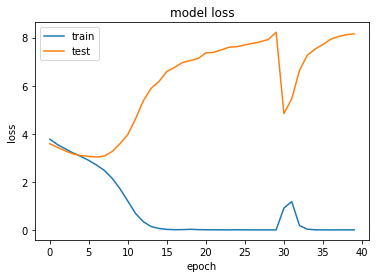

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

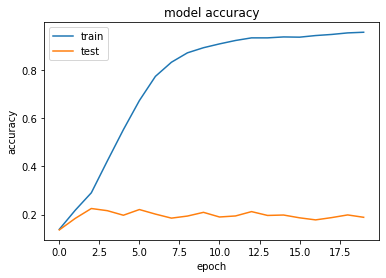

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#1. With Batch Norm
# Creating a Sequential model
from keras.layers import Dropout
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(100,100,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
#model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(61,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )




# Training the model
history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))	


Epoch 1/20
140/140 [==============================] - 174s 1s/step - loss: 4.4538 - acc: 0.0947 - val_loss: 4.8727 - val_acc: 0.1034
Epoch 2/20
140/140 [==============================] - 171s 1s/step - loss: 3.5070 - acc: 0.1699 - val_loss: 3.5823 - val_acc: 0.1523
Epoch 3/20
140/140 [==============================] - 174s 1s/step - loss: 2.9302 - acc: 0.2689 - val_loss: 3.8864 - val_acc: 0.1557
Epoch 4/20
140/140 [==============================] - 172s 1s/step - loss: 2.4157 - acc: 0.3617 - val_loss: 3.4947 - val_acc: 0.2025
Epoch 5/20
140/140 [==============================] - 170s 1s/step - loss: 2.0247 - acc: 0.4351 - val_loss: 4.5432 - val_acc: 0.1943
Epoch 6/20
140/140 [==============================] - 170s 1s/step - loss: 1.5617 - acc: 0.5551 - val_loss: 4.2987 - val_acc: 0.2025
Epoch 7/20
140/140 [==============================] - 170s 1s/step - loss: 1.1669 - acc: 0.6596 - val_loss: 4.4831 - val_acc: 0.1875
Epoch 8/20
140/140 [==============================] - 170s 1s/step - 

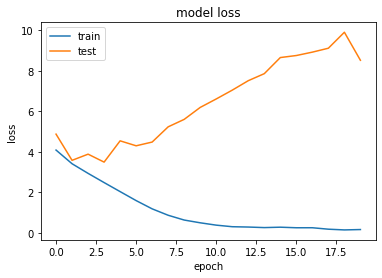

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

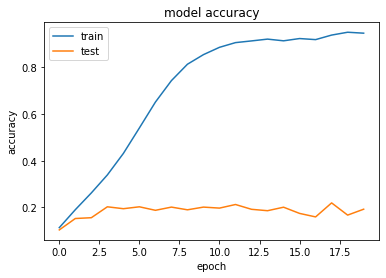

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
	# Evaluating model on validation data
	evaluate = model.evaluate(x_val,y_val)
	print(evaluate)

73/73 [==============================] - 15s 208ms/step - loss: 8.5127 - acc: 0.1922
[8.512722969055176, 0.1921921968460083]


In [ ]:
predictTestData()

f8961bffbe.jpg
Predicted :-  coffee-with-caffeine
589b21a1da.jpg
Predicted :-  chicken
d52466324a.jpg
Predicted :-  parmesan
dd7edf9405.jpg
Predicted :-  water
0c3bf8b3bb.jpg
Predicted :-  bread-white
0920aa3bf3.jpg
Predicted :-  apple
26b261b6b0.jpg
Predicted :-  coffee-with-caffeine
4f5991c6b7.jpg
Predicted :-  tomato
6c2eaa8a44.jpg
Predicted :-  carrot
231e87900b.jpg
Predicted :-  ham-raw
6c3af2ee6c.jpg
Predicted :-  potatoes-steamed
71e61d2081.jpg
Predicted :-  bread-wholemeal
4fe65083b2.jpg
Predicted :-  mixed-vegetables
75789955cc.jpg
Predicted :-  apple
3c092b6869.jpg
Predicted :-  jam
b9bec06826.jpg
Predicted :-  strawberries
68e4399d82.jpg
Predicted :-  white-coffee-with-caffeine
1064b4277e.jpg
Predicted :-  honey
8ac612f3f2.jpg
Predicted :-  salad-leaf-salad-green
3636cb3fc3.jpg
Predicted :-  beer
3f73c055c3.jpg
Predicted :-  water
3ee6561df0.jpg
Predicted :-  bread-whole-wheat
00befedd19.jpg
Predicted :-  egg
932322b42d.jpg
Predicted :-  bread-wholemeal
3c90c600f6.jpg
Predic

In [ ]:
#3. With Dropout

In [ ]:
# Creating a Sequential model
from keras.layers import Dropout
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(100,100,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
#model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(61,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )
# Training the model
history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/20
140/140 [==============================] - 172s 1s/step - loss: 4.4916 - acc: 0.0924 - val_loss: 3.8303 - val_acc: 0.1055
Epoch 2/20
140/140 [==============================] - 175s 1s/step - loss: 3.5864 - acc: 0.1707 - val_loss: 3.7078 - val_acc: 0.1171
Epoch 3/20
140/140 [==============================] - 172s 1s/step - loss: 3.1136 - acc: 0.2256 - val_loss: 3.9570 - val_acc: 0.1244
Epoch 4/20
140/140 [==============================] - 172s 1s/step - loss: 2.7119 - acc: 0.2982 - val_loss: 3.5390 - val_acc: 0.2051
Epoch 5/20
140/140 [==============================] - 171s 1s/step - loss: 2.3442 - acc: 0.3560 - val_loss: 3.6673 - val_acc: 0.1913
Epoch 6/20
140/140 [==============================] - 172s 1s/step - loss: 1.9438 - acc: 0.4538 - val_loss: 4.0028 - val_acc: 0.2111
Epoch 7/20
140/140 [==============================] - 173s 1s/step - loss: 1.6597 - acc: 0.5325 - val_loss: 4.5265 - val_acc: 0.1737
Epoch 8/20
140/140 [==============================] - 172s 1s/step - 

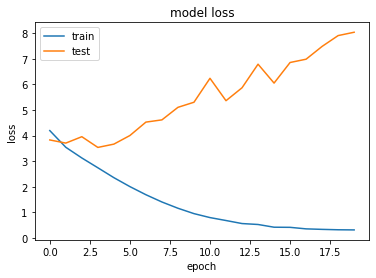

In [ ]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


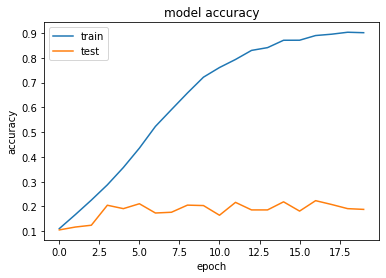

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictTestData()

73/73 [==============================] - 14s 187ms/step - loss: 6.7402 - acc: 0.1909
[6.74017333984375, 0.19090518355369568]
62d2ea7747.jpg
Predicted :-  carrot
fd6ab69a63.jpg
Predicted :-  bread-white
3636cb3fc3.jpg
Predicted :-  hard-cheese
1af2f3f062.jpg
Predicted :-  bread-wholemeal
b9d0e34a4f.jpg
Predicted :-  egg
da4611c65a.jpg
Predicted :-  water
d5df1ab5ec.jpg
Predicted :-  tea
a31fc638ba.jpg
Predicted :-  sauce-savoury
d5e685f830.jpg
Predicted :-  honey
58d4e4c8a1.jpg
Predicted :-  tomato
d808c27bfe.jpg
Predicted :-  tomato
25e87d561c.jpg
Predicted :-  butter
c9579834fd.jpg
Predicted :-  mixed-salad-chopped-without-sauce
231e87900b.jpg
Predicted :-  tomato
82c042d01d.jpg
Predicted :-  bread-wholemeal
af1e7a6c10.jpg
Predicted :-  chicken
7f5041231f.jpg
Predicted :-  jam
1ae217abf1.jpg
Predicted :-  carrot
afd4cdd8fe.jpg
Predicted :-  coffee-with-caffeine
97d58dd0e5.jpg
Predicted :-  salad-leaf-salad-green
8aa1337489.jpg
Predicted :-  beer
32dd79e40c.jpg
Predicted :-  chicken
8a

In [ ]:
#4.Different activation functions at the end

In [ ]:
	#4.Different activation functions at the end
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(100,100,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))
#model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(61,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )




# Training the model
history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/20
140/140 [==============================] - 179s 1s/step - loss: 3.8553 - acc: 0.1285 - val_loss: 3.8257 - val_acc: 0.1480
Epoch 2/20
140/140 [==============================] - 165s 1s/step - loss: 2.8976 - acc: 0.2707 - val_loss: 3.4934 - val_acc: 0.1810
Epoch 3/20
140/140 [==============================] - 165s 1s/step - loss: 2.1687 - acc: 0.4228 - val_loss: 3.2435 - val_acc: 0.2033
Epoch 4/20
140/140 [==============================] - 166s 1s/step - loss: 1.4213 - acc: 0.6191 - val_loss: 3.5843 - val_acc: 0.2158
Epoch 5/20
140/140 [==============================] - 165s 1s/step - loss: 0.7435 - acc: 0.8088 - val_loss: 4.2672 - val_acc: 0.2021
Epoch 6/20
140/140 [==============================] - 166s 1s/step - loss: 0.3309 - acc: 0.9236 - val_loss: 5.2641 - val_acc: 0.2222
Epoch 7/20
140/140 [==============================] - 165s 1s/step - loss: 0.1270 - acc: 0.9741 - val_loss: 5.8607 - val_acc: 0.2209
Epoch 8/20
140/140 [==============================] - 165s 1s/step - 

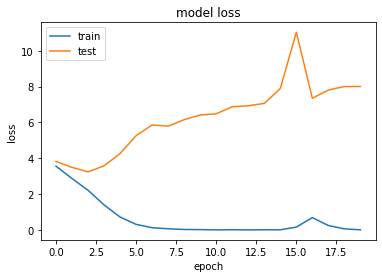

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


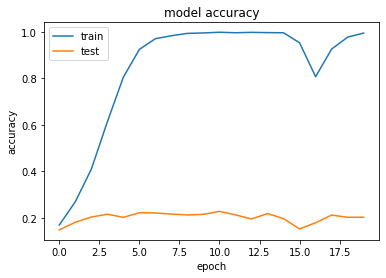

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
	# Evaluating model on validation data
	evaluate = model.evaluate(x_val,y_val)
	print(evaluate)




predictions=[]
for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        print(filename)
        img=img/255
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
       # print(np.array(img).shape)
        x=[]
        x.append(img)
        predict = model.predict(np.array(x))
        print("Predicted :- ",reverseDict[np.argmax(predict)])
        predictions.append(reverseDict[np.argmax(predict)])

73/73 [==============================] - 13s 176ms/step - loss: 6.9844 - acc: 0.2347
[6.984370708465576, 0.2346632331609726]
62d2ea7747.jpg
Predicted :-  carrot
fd6ab69a63.jpg
Predicted :-  croissant
3636cb3fc3.jpg
Predicted :-  water
1af2f3f062.jpg
Predicted :-  coffee-with-caffeine
b9d0e34a4f.jpg
Predicted :-  bread-sourdough
da4611c65a.jpg
Predicted :-  water
d5df1ab5ec.jpg
Predicted :-  coffee-with-caffeine
a31fc638ba.jpg
Predicted :-  almonds
d5e685f830.jpg
Predicted :-  bread-wholemeal
58d4e4c8a1.jpg
Predicted :-  bread-french-white-flour
d808c27bfe.jpg
Predicted :-  wine-red
25e87d561c.jpg
Predicted :-  salad-leaf-salad-green
c9579834fd.jpg
Predicted :-  butter
231e87900b.jpg
Predicted :-  tomato-sauce
82c042d01d.jpg
Predicted :-  water
af1e7a6c10.jpg
Predicted :-  water
7f5041231f.jpg
Predicted :-  white-coffee-with-caffeine
1ae217abf1.jpg
Predicted :-  carrot
afd4cdd8fe.jpg
Predicted :-  coffee-with-caffeine
97d58dd0e5.jpg
Predicted :-  rice
8aa1337489.jpg
Predicted :-  beer
3

In [ ]:
#5.Different pooling strategies
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(100,100,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))
#model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dense(61,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )




# Training the model
history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/20
140/140 [==============================] - 165s 1s/step - loss: 3.9224 - acc: 0.1038 - val_loss: 3.8640 - val_acc: 0.1540
Epoch 2/20
140/140 [==============================] - 163s 1s/step - loss: 3.1056 - acc: 0.2270 - val_loss: 3.6839 - val_acc: 0.1973
Epoch 3/20
140/140 [==============================] - 162s 1s/step - loss: 2.5632 - acc: 0.3302 - val_loss: 3.3680 - val_acc: 0.2102
Epoch 4/20
140/140 [==============================] - 163s 1s/step - loss: 1.9993 - acc: 0.4561 - val_loss: 3.1956 - val_acc: 0.2308
Epoch 5/20
140/140 [==============================] - 163s 1s/step - loss: 1.4119 - acc: 0.6075 - val_loss: 3.5194 - val_acc: 0.2124
Epoch 6/20
140/140 [==============================] - 163s 1s/step - loss: 0.9992 - acc: 0.7154 - val_loss: 4.2287 - val_acc: 0.2119
Epoch 7/20
140/140 [==============================] - 163s 1s/step - loss: 0.7408 - acc: 0.7915 - val_loss: 4.6897 - val_acc: 0.2008
Epoch 8/20
140/140 [==============================] - 163s 1s/step - 

In [ ]:
	# Evaluating model on validation data
	evaluate = model.evaluate(x_val,y_val)
	print(evaluate)




predictions=[]
for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        print(filename)
        img=img/255
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
       # print(np.array(img).shape)
        x=[]
        x.append(img)
        predict = model.predict(np.array(x))
        print("Predicted :- ",reverseDict[np.argmax(predict)])
        predictions.append(reverseDict[np.argmax(predict)])

73/73 [==============================] - 13s 178ms/step - loss: 8.0136 - acc: 0.1995
[8.013602256774902, 0.1994851976633072]
f8961bffbe.jpg
Predicted :-  apple
589b21a1da.jpg
Predicted :-  bread-white
d52466324a.jpg
Predicted :-  bread-whole-wheat
dd7edf9405.jpg
Predicted :-  water
0c3bf8b3bb.jpg
Predicted :-  apple
0920aa3bf3.jpg
Predicted :-  apple
26b261b6b0.jpg
Predicted :-  water
4f5991c6b7.jpg
Predicted :-  bread-wholemeal
6c2eaa8a44.jpg
Predicted :-  tomato
231e87900b.jpg
Predicted :-  tomato
6c3af2ee6c.jpg
Predicted :-  beer
71e61d2081.jpg
Predicted :-  tomato
4fe65083b2.jpg
Predicted :-  egg
75789955cc.jpg
Predicted :-  biscuits
3c092b6869.jpg
Predicted :-  tomato
b9bec06826.jpg
Predicted :-  water
68e4399d82.jpg
Predicted :-  white-coffee-with-caffeine
1064b4277e.jpg
Predicted :-  bread-white
8ac612f3f2.jpg
Predicted :-  tea-green
3636cb3fc3.jpg
Predicted :-  sauce-savoury
3f73c055c3.jpg
Predicted :-  egg
3ee6561df0.jpg
Predicted :-  banana
00befedd19.jpg
Predicted :-  white-

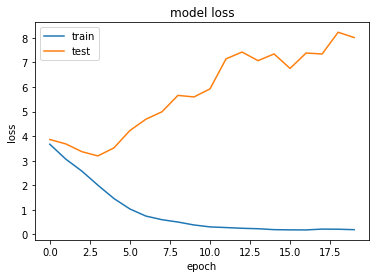

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


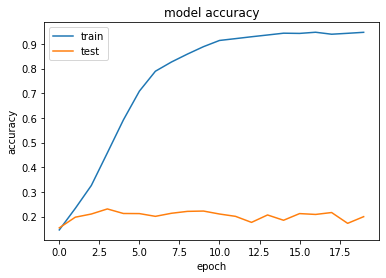

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
	#6. Different pooling strategies
# Creating a Sequential model
from keras.layers import AveragePooling2D
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(100,100,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
#model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(61,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )




# Training the model
history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))


Epoch 1/20
140/140 [==============================] - 172s 1s/step - loss: 4.3686 - acc: 0.0962 - val_loss: 3.8439 - val_acc: 0.1098
Epoch 2/20
140/140 [==============================] - 174s 1s/step - loss: 3.6529 - acc: 0.1707 - val_loss: 3.7451 - val_acc: 0.1454
Epoch 3/20
140/140 [==============================] - 170s 1s/step - loss: 3.1721 - acc: 0.2363 - val_loss: 4.9008 - val_acc: 0.1141
Epoch 4/20
140/140 [==============================] - 170s 1s/step - loss: 2.6862 - acc: 0.2960 - val_loss: 4.2840 - val_acc: 0.1566
Epoch 5/20
140/140 [==============================] - 170s 1s/step - loss: 2.2159 - acc: 0.3899 - val_loss: 4.4387 - val_acc: 0.1793
Epoch 6/20
140/140 [==============================] - 171s 1s/step - loss: 1.6935 - acc: 0.5232 - val_loss: 4.5182 - val_acc: 0.1819
Epoch 7/20
140/140 [==============================] - 170s 1s/step - loss: 1.2816 - acc: 0.6329 - val_loss: 5.1345 - val_acc: 0.1750
Epoch 8/20
140/140 [==============================] - 170s 1s/step - 

In [ ]:
	# Evaluating model on validation data
	evaluate = model.evaluate(x_val,y_val)
	print(evaluate)




predictions=[]
for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        print(filename)
        img=img/255
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
       # print(np.array(img).shape)
        x=[]
        x.append(img)
        predict = model.predict(np.array(x))
        print("Predicted :- ",reverseDict[np.argmax(predict)])
        predictions.append(reverseDict[np.argmax(predict)])

73/73 [==============================] - 14s 196ms/step - loss: 10.6220 - acc: 0.1699
[10.622001647949219, 0.16988417506217957]
f8961bffbe.jpg
Predicted :-  coffee-with-caffeine
589b21a1da.jpg
Predicted :-  bread-white
d52466324a.jpg
Predicted :-  bread-wholemeal
dd7edf9405.jpg
Predicted :-  water
0c3bf8b3bb.jpg
Predicted :-  bread-white
0920aa3bf3.jpg
Predicted :-  mixed-vegetables
26b261b6b0.jpg
Predicted :-  bread-wholemeal
4f5991c6b7.jpg
Predicted :-  bread-white
6c2eaa8a44.jpg
Predicted :-  water
231e87900b.jpg
Predicted :-  tomato
6c3af2ee6c.jpg
Predicted :-  water
71e61d2081.jpg
Predicted :-  tomato
4fe65083b2.jpg
Predicted :-  cheese
75789955cc.jpg
Predicted :-  bread-white
3c092b6869.jpg
Predicted :-  jam
b9bec06826.jpg
Predicted :-  bread-wholemeal
68e4399d82.jpg
Predicted :-  white-coffee-with-caffeine
1064b4277e.jpg
Predicted :-  butter
8ac612f3f2.jpg
Predicted :-  banana
3636cb3fc3.jpg
Predicted :-  water
3f73c055c3.jpg
Predicted :-  egg
3ee6561df0.jpg
Predicted :-  butter

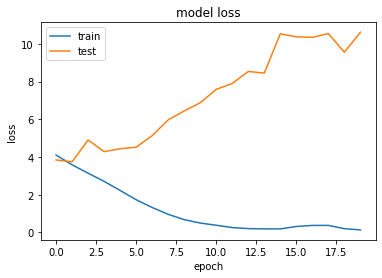

In [ ]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

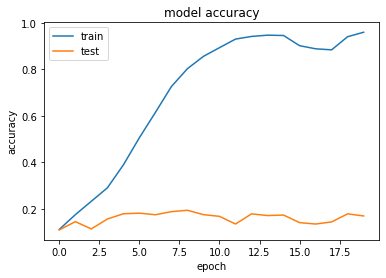

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#7.Different optimizers
# Creating a Sequential model
from keras.layers import AveragePooling2D
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(100,100,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
#model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(61,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )




# Training the model
history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))

# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)




predictions=[]
for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        print(filename)
        img=img/255
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
       # print(np.array(img).shape)
        x=[]
        x.append(img)
        predict = model.predict(np.array(x))
        print("Predicted :- ",reverseDict[np.argmax(predict)])
        predictions.append(reverseDict[np.argmax(predict)])

Epoch 1/20
140/140 [==============================] - 175s 1s/step - loss: 4.3200 - acc: 0.0859 - val_loss: 3.7534 - val_acc: 0.1454
Epoch 2/20
140/140 [==============================] - 177s 1s/step - loss: 3.5354 - acc: 0.1686 - val_loss: 3.8831 - val_acc: 0.1390
Epoch 3/20
140/140 [==============================] - 170s 1s/step - loss: 3.1215 - acc: 0.2201 - val_loss: 3.7504 - val_acc: 0.1639
Epoch 4/20
140/140 [==============================] - 170s 1s/step - loss: 2.7237 - acc: 0.2810 - val_loss: 3.5405 - val_acc: 0.1883
Epoch 5/20
140/140 [==============================] - 170s 1s/step - loss: 2.1916 - acc: 0.4076 - val_loss: 5.3921 - val_acc: 0.1789
Epoch 6/20
140/140 [==============================] - 169s 1s/step - loss: 1.6874 - acc: 0.5242 - val_loss: 4.9266 - val_acc: 0.1480
Epoch 7/20
140/140 [==============================] - 169s 1s/step - loss: 1.2421 - acc: 0.6425 - val_loss: 5.2648 - val_acc: 0.1660
Epoch 8/20
140/140 [==============================] - 170s 1s/step - 

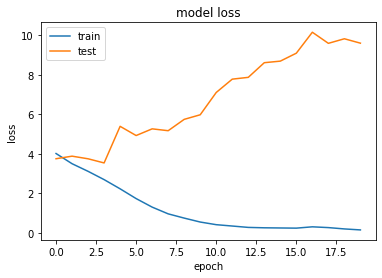

In [ ]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
import csv
with open('submission.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['ClassName'])
    for y in predictions:
        writer.writerow([y])

In [ ]:
predictions

['butter',
 'bread-wholemeal',
 'bread-white',
 'water',
 'espresso-with-caffeine',
 'bread-white',
 'coffee-with-caffeine',
 'potatoes-steamed',
 'carrot',
 'tomato',
 'butter',
 'tomato',
 'mixed-vegetables',
 'apple',
 'salad-leaf-salad-green',
 'bread-wholemeal',
 'water',
 'cheese',
 'salad-leaf-salad-green',
 'wine-white',
 'mayonnaise',
 'parmesan',
 'water',
 'jam',
 'chips-french-fries',
 'parmesan',
 'jam',
 'jam',
 'pasta-spaghetti',
 'corn',
 'sauce-savoury',
 'sauce-savoury',
 'tomato',
 'gruyere',
 'rice',
 'water',
 'butter',
 'wine-white',
 'coffee-with-caffeine',
 'butter',
 'mixed-vegetables',
 'gruyere',
 'mandarine',
 'bread-white',
 'tomato',
 'coffee-with-caffeine',
 'wine-red',
 'butter',
 'coffee-with-caffeine',
 'salad-leaf-salad-green',
 'potatoes-steamed',
 'wine-white',
 'tomato',
 'bread-white',
 'mixed-nuts',
 'water',
 'chips-french-fries',
 'carrot',
 'mixed-nuts',
 'tea',
 'water',
 'corn',
 'chicken',
 'water',
 'beer',
 'parmesan',
 'salad-leaf-salad-

In [ ]:
#7.augmentation

In [ ]:
HEIGHT=50
WIDTH=50
def trainAugModel():
  # Training the model
  history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))

def evaluateAugModel():
  # Evaluating model on validation data
  evaluate = model.evaluate(x_val,y_val)
  print(evaluate)


def predictAugTestData():

  shape=(HEIGHT,WIDTH)
  for filename in os.listdir(test_path):
      if filename.split('.')[1] == 'jpg':
          img = cv2.imread(os.path.join(test_path,filename))
          print(filename)
          img=img/255
          # Resize all images to a specific shape
          img = cv2.resize(img,shape)
         
        # print(np.array(img).shape)
          x=[]
          x.append(img)
          predict = model.predict(np.array(x))
          print("Predicted :- ",reverseDict[np.argmax(predict)])
          predictions.append(reverseDict[np.argmax(predict)])
def processTrainingAugData():
  ## Processing training data
  # -> appending images in a list 'train_images'
  #




  shape=(HEIGHT,WIDTH) 
  #train_path = '../input/fruit-images-for-object-detection/train_zip/train'


  train_className=train_df['ClassName']
  trainUnqClss= np.unique(np.array(train_className))
  
  counter=0
  for i in trainUnqClss :
      trainDict[i]=counter
      counter=counter+1
      
      
  fileind = dict(zip(train_df['ImageId'],train_df['ClassName']))  
  for filename in os.listdir(train_path):
      if filename.split('.')[1] == 'jpg':
          img = cv2.imread(os.path.join(train_path,filename))
          img=img/255
        # Resize all images to a specific shape

          img = cv2.resize(img,shape)
          
          train_images.append(img)
          train_labels.append(trainDict[fileind[filename]]) 
          #rotation by 90 degress anticlockwise
          img = tf.image.rot90(img, k=1)
          train_images.append(img)
          train_labels.append(trainDict[fileind[filename]]) 
          x = tf.placeholder(dtype = tf.float32, shape = shape)
          img = tf.image.pad_to_bounding_box(img, 10, 10, 50 + 10 + 10, 50 + 10 + 10)
          train_images.append(img)
          train_labels.append(trainDict[fileind[filename]]) 

def plotGraph():
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()         

In [ ]:
processTrainingAugData()

In [ ]:
reverseDict={}
l1=[]
l2=[]
for key in trainDict:
    l1.append(trainDict[key])
    l2.append(key)

reverseDict = dict(zip(l1,l2))
print(reverseDict)

{0: 'almonds', 1: 'apple', 2: 'avocado', 3: 'banana', 4: 'beer', 5: 'biscuits', 6: 'boisson-au-glucose-50g', 7: 'bread-french-white-flour', 8: 'bread-sourdough', 9: 'bread-white', 10: 'bread-whole-wheat', 11: 'bread-wholemeal', 12: 'broccoli', 13: 'butter', 14: 'carrot', 15: 'cheese', 16: 'chicken', 17: 'chips-french-fries', 18: 'coffee-with-caffeine', 19: 'corn', 20: 'croissant', 21: 'cucumber', 22: 'dark-chocolate', 23: 'egg', 24: 'espresso-with-caffeine', 25: 'french-beans', 26: 'gruyere', 27: 'ham-raw', 28: 'hard-cheese', 29: 'honey', 30: 'jam', 31: 'leaf-spinach', 32: 'mandarine', 33: 'mayonnaise', 34: 'mixed-nuts', 35: 'mixed-salad-chopped-without-sauce', 36: 'mixed-vegetables', 37: 'onion', 38: 'parmesan', 39: 'pasta-spaghetti', 40: 'pickle', 41: 'pizza-margherita-baked', 42: 'potatoes-steamed', 43: 'rice', 44: 'salad-leaf-salad-green', 45: 'salami', 46: 'salmon', 47: 'sauce-savoury', 48: 'soft-cheese', 49: 'strawberries', 50: 'sweet-pepper', 51: 'tea', 52: 'tea-green', 53: 'tom

In [ ]:
# Visualizing Training data
print(train_labels[9001])
plt.imshow(train_images[9001])
trainDict


In [ ]:
# Converting labels into One Hot encoded sparse matrix
train_labels=to_categorical(train_labels)
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)



In [ ]:
print(x_train.shape)

print(x_val.shape)

print(y_train.shape)

print(y_val.shape)

print(train_images.shape)

print(train_labels.shape)

(20976,)
(6993,)
(20976, 61)
(6993, 61)
(27969,)
(27969, 61)


In [ ]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(50,50,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(61,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [ ]:
  history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))


Epoch 1/20
280/280 [==============================] - 102s 360ms/step - loss: 3.6836 - acc: 0.1294 - val_loss: 3.1998 - val_acc: 0.2044
Epoch 2/20
280/280 [==============================] - 100s 357ms/step - loss: 3.1096 - acc: 0.2256 - val_loss: 3.0127 - val_acc: 0.2295
Epoch 3/20
280/280 [==============================] - 100s 359ms/step - loss: 2.8635 - acc: 0.2639 - val_loss: 2.8890 - val_acc: 0.2630
Epoch 4/20
280/280 [==============================] - 101s 362ms/step - loss: 2.5952 - acc: 0.3137 - val_loss: 2.8582 - val_acc: 0.2610
Epoch 5/20
280/280 [==============================] - 100s 359ms/step - loss: 2.3350 - acc: 0.3667 - val_loss: 2.7855 - val_acc: 0.2891
Epoch 6/20
280/280 [==============================] - 100s 356ms/step - loss: 2.0523 - acc: 0.4327 - val_loss: 2.9365 - val_acc: 0.2683
Epoch 7/20
280/280 [==============================] - 101s 359ms/step - loss: 1.7801 - acc: 0.4986 - val_loss: 2.9986 - val_acc: 0.2630
Epoch 8/20
280/280 [============================

In [ ]:
evaluateAugModel()

146/146 [==============================] - 9s 58ms/step - loss: 6.9828 - acc: 0.2147
[6.98284912109375, 0.21471472084522247]


In [ ]:
predictAugTestData()

f8961bffbe.jpg
Predicted :-  espresso-with-caffeine
589b21a1da.jpg
Predicted :-  mixed-vegetables
d52466324a.jpg
Predicted :-  butter
dd7edf9405.jpg
Predicted :-  water
0c3bf8b3bb.jpg
Predicted :-  bread-white
0920aa3bf3.jpg
Predicted :-  strawberries
26b261b6b0.jpg
Predicted :-  water
4f5991c6b7.jpg
Predicted :-  rice
6c2eaa8a44.jpg
Predicted :-  apple
231e87900b.jpg
Predicted :-  bread-white
6c3af2ee6c.jpg
Predicted :-  carrot
71e61d2081.jpg
Predicted :-  chips-french-fries
4fe65083b2.jpg
Predicted :-  chicken
75789955cc.jpg
Predicted :-  apple
3c092b6869.jpg
Predicted :-  zucchini
b9bec06826.jpg
Predicted :-  salami
68e4399d82.jpg
Predicted :-  white-coffee-with-caffeine
1064b4277e.jpg
Predicted :-  avocado
8ac612f3f2.jpg
Predicted :-  cucumber
3636cb3fc3.jpg
Predicted :-  butter
3f73c055c3.jpg
Predicted :-  jam
3ee6561df0.jpg
Predicted :-  carrot
00befedd19.jpg
Predicted :-  tea
932322b42d.jpg
Predicted :-  bread-wholemeal
3c90c600f6.jpg
Predicted :-  almonds
61818db41f.jpg
Predict

In [ ]:
  shape=(HEIGHT,WIDTH)
  predictedData=[]
  for filename in os.listdir(test_path):
      if filename.split('.')[1] == 'jpg':
          img = cv2.imread(os.path.join(test_path,filename))
        #  print(filename)
          img=img/255
          # Resize all images to a specific shape
          img = cv2.resize(img,shape)
         
        # print(np.array(img).shape)
          x=[]
          x.append(img)
          predict = model.predict(np.array(x))
          print(reverseDict[np.argmax(predict)],",")
          
          predictions.append(reverseDict[np.argmax(predict)])

espresso-with-caffeine ,
mixed-vegetables ,
butter ,
water ,
bread-white ,
strawberries ,
water ,
rice ,
apple ,
bread-white ,
carrot ,
chips-french-fries ,
chicken ,
apple ,
zucchini ,
salami ,
white-coffee-with-caffeine ,
avocado ,
cucumber ,
butter ,
jam ,
carrot ,
tea ,
bread-wholemeal ,
almonds ,
pasta-spaghetti ,
cheese ,
chips-french-fries ,
rice ,
mixed-vegetables ,
tomato ,
carrot ,
chicken ,
butter ,
zucchini ,
water-mineral ,
coffee-with-caffeine ,
bread-white ,
coffee-with-caffeine ,
butter ,
bread-wholemeal ,
water ,
mandarine ,
salad-leaf-salad-green ,
bread-french-white-flour ,
tomato ,
wine-red ,
chips-french-fries ,
boisson-au-glucose-50g ,
sweet-pepper ,
potatoes-steamed ,
water ,
chips-french-fries ,
cheese ,
white-coffee-with-caffeine ,
cheese ,
butter ,
rice ,
gruyere ,
coffee-with-caffeine ,
water ,
sweet-pepper ,
bread-wholemeal ,
tomato ,
wine-red ,
chicken ,
salad-leaf-salad-green ,
tea-green ,
butter ,
salad-leaf-salad-green ,
tea ,
broccoli ,
potatoes-steamed

In [ ]:
predictions

In [ ]:
!rm -rf data
!mkdir data


'rm' is not recognized as an internal or external command,
operable program or batch file.


## Making Direct Submission thought Aicrowd CLI

In [ ]:
!aicrowd submission create -c chunin-exams-food-track-cv-2021 -f submission.csv

submission.csv ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0% • 8.0/6.3 KB • ? • 0:00:00
                                               ╭─────────────────────────╮                                               
                                               │ Successfully submitted! │                                               
                                               ╰─────────────────────────╯                                               
                                                     Important links                                                     
┌──────────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/chunin-exams-food-track-cv-2021/submissions/131120              │
│                  │                                                                                                    │
│  All submissions │ https://www.aicrowd.com/challenges/chunin-ex